1.|φ+>
 2.|φ->
 3.|Ψ+>
 4.|Ψ->



Give a number from 1 to 4:  4


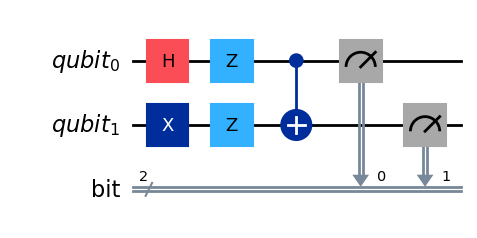

In [8]:
from qiskit import *
# from qiskit.tools.monitor import job_monitor
# from qiskit.tools.visualization import plot_histogram
# from qiskit.providers.ibmq import least_busy
# from qiskit import IBMQ, QuantumCircuit, transpile, assemble
from pythonosc import udp_client, dispatcher
import numpy as np
import socket
import random
import time
def menu():
    print("1.|φ+>\n",
          "2.|φ->\n",
          "3.|Ψ+>\n",
          "4.|Ψ->\n")
menu()
q = QuantumRegister(2,'qubit')
c = ClassicalRegister(2,'bit')
qc = QuantumCircuit(q,c)
choice = int(input("Give a number from 1 to 4: "))
if choice == 1:
    qc.h(q[0])
    qc.id(q[1])
    qc.cx(q[0],q[1])
    qc.measure(q,c)
elif choice == 2:
    qc.x(q[0])
    qc.id(q[1])
    qc.h(q[0])
    qc.id(q[1])
    qc.cx(q[0],q[1])

    qc.measure(q,c)
elif choice == 3:
    qc.h(q[0])
    qc.x(q[1])
    qc.cx(q[0],q[1])
    qc.measure(q,c)
elif choice == 4:
    qc.h(q[0])
    qc.x(q[1])
    qc.z(q[0])
    qc.z(q[1])
    qc.cx(q[0],q[1])

    
    qc.measure(q,c)
    
qc.draw(output = "mpl")




In [9]:
from qiskit.primitives import Sampler
# from qiskit.visualization import plot_distribution, plot_histogram

results = Sampler().run( qc, shots=1024 ). result()

answer = results.quasi_dists[0].binary_probabilities()
print(answer)
# answer = results.get_counts(qc)
# print(int(results))


{'01': 0.529296875, '10': 0.470703125}


In [11]:


address = socket.gethostbyname(socket.gethostname())
port = 4560
first_states =[]
final_states =[]
bell_states_music =list(answer.keys())
bell_states_music_phase = list(answer.values())


for i in bell_states_music[0]:
    first_states.append(i)

for j in bell_states_music[1]:
    final_states.append(j)
    
# Phase_0 = (bell_states_music_phase[0]/1000)
# Phase_1 = (bell_states_music_phase[1]/1000)

# phase_0 = float(round(Phase_0,1))
# phase_1 = float(round(Phase_1,1))

client = udp_client.SimpleUDPClient(address, 4560)

client.send_message("/first_states",first_states)
client.send_message("/final_states",final_states)
# client.send_message("/phase_0",phase_0)
# client.send_message("/phase_1",phase_1)









bell_states_phase =list(answer.values())
phase_0 = (bell_states_phase[0]/1000)
phase_1 = (bell_states_phase[1]/1000)

print(phase_0)
print(phase_1)

client.send_message("/phase_0",phase_0)
client.send_message("/phase_1",phase_1)


In [8]:
IBMQ.save_account('271c5557db1736159a658638fd8c19b13eb3a24485a261eeff93994490c03f67ffc2c6ec9ce6558c0cc2faa5fe0d2876d5f38951a4ffc904161c42947f29d3ee', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

# from qiskit import IBMQ
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and
                                                       not x.configuration().simulator and
                                                       x.status().operational == True))
# # Get all available backends
# # backends = provider.backends()

# # real_backends=[backend for backend in backends if not backend.configuration().simulator and backend.status().operational]

# # least_busy_backend = least_busy(real_backends)
print(device)



ibmqfactory.load_account:WARNING:2024-01-14 01:14:10,929: Credentials are already in use. The existing account in the session will be replaced.


ibm_kyoto


In [9]:
job = execute(qc,backend = device,shots = 1024).result()
device_result = job.get_counts()

quantum_results = device_result
classical_results=answer


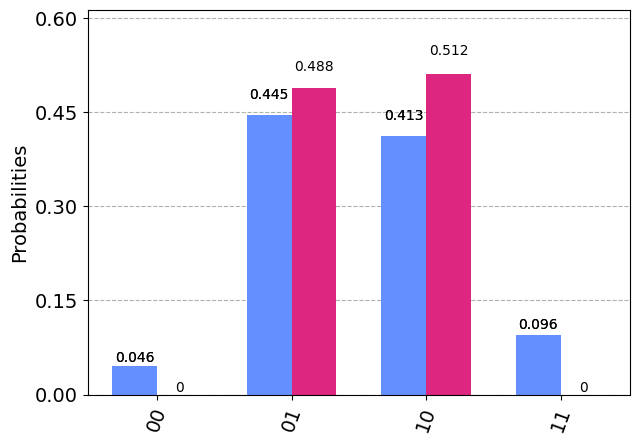

In [10]:
plot_histogram([quantum_results,classical_results], bar_labels=True)


In [9]:
# device = provider.get_backend('ibm_osaka') 
# from qiskit.tools.monitor import job_monitor
# Job = job_monitor(job) # Job Status: job is queued (73) αν δείτε κάτι τέτοιο... θα αργήσει!
# print(Job)

job = execute(qc, backend = device, shots = 1024)
device_result = job.result()

quantum_results = device_result.get_counts()
classical_results=answer


plot_histogram([quantum_results,classical_results], bar_labels=True)

# print(job.job_id())
# from qiskit.tools.monitor import job_monitor
# Job = job_monitor(job) # Job Status: job is queued (73) αν δείτε κάτι τέτοιο... θα αργήσει!
# print(Job)
# device_result = job.result()
# plot_histogram(device_result.get_counts(qc))
# if data[0][1] == '1':
#     pitch = int(( *127)/12 + 60)
#     p.append(pitch)

PanicException: StableGraph::add_edge: node index 1 is not a node in the graph

In [10]:
device_result = job.result()
# plot_histogram(device_result.get_counts(qc),title='Bell States σε πραγματικό κβαντικό υπολογιστή',color = 'red')

AttributeError: Attribute result is not defined

In [ ]:
# device = provider.get_backend('ibmq_lima') # όποιο μας προτείνει
quantum_results = device_result.get_counts()
classical_results=answer

plot_histogram([quantum_results,classical_results], bar_labels=True)


In [ ]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector
from pythonosc import udp_client, dispatcher
import numpy as np
import socket
import random
import time


address = socket.gethostbyname(socket.gethostname())
port = 4560
client = udp_client.SimpleUDPClient(address, port)
n = 2


q = QuantumRegister(n,name = 'qubit')
c = ClassicalRegister(n,name = 'bit')
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.z(q[0])
qc.h(q[0])

qc.measure(q,c)
qc.draw("mpl")
# client = udp_client.SimpleUDPClient("127.0.0.1", 4560)

# client.send_message("/Play",List)


In [ ]:
# jfrom qiskit import QuantumCircuit, Aer, execute
# from qiskit.visualization import plot_bloch_multivector

# # Create a quantum circuit
# qc = QuantumCircuit(1)
# qc.h(0)  # Apply a Hadamard gate to create a superposition

# # Simulate the circuit to obtain the statevector
# backend = Aer.get_backend('statevector_simulator')
# result = execute(qc, backend).result()
# statevector = result.get_statevector()

# # Print the phase of the statevector
# phase =float (statevector[1])  # Extract the phase component of the statevector
# print("The phase of the state is:", phase)


# from qiskit import QuantumCircuit, Aer, execute


# Create a quantum circuit
qc = QuantumCircuit(2)
qc.h(0)  # Apply a Hadamard gate to qubit 0
phase_change = 2 * 3.14159 / 3  # π/3 in radians
qc.rz(phase_change, 0)
# Simulate the circuit to obtain the statevector
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector()

# Print the amplitude of the statevector
for amplitude in statevector:
    print(amplitude)
phase =float (statevector[1])  # Extract the phase component of the statevector
print(phase)

In [ ]:
result = execute(qc, BasicAer.get_backend('statevector_simulator')).result()
z  = result.get_statevector(qc)
plot_bloch_multivector(z,title="Bloch σφαίρα για cX|11>")

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(qc),title='Πύλη Handard σε πραγματικό κβαντικό υπολογιστή',color = 'red')










# #Παραάδειγμα 2
# from qiskit import *
# from qiskit.visualization import plot_histogram
# from qiskit import IBMQ
# from qiskit.providers.ibmq import least_busy
# n = 3
# qr = QuantumRegister(n, 'q')
# cr = ClassicalRegister(n, 'b')
# qc = QuantumCircuit(qr,cr)
# qc.h(0)
# for i in range(1,n):
#     qc.cx(0,i)
# qc.barrier()
# qc.measure(qr,cr)
# qc.draw(output='mpl')

# IBMQ.save_account('15115150cb3b379e32bdc053e55e90b4b55c2e53098e3acd108681a055cb980004d87e5800365ae0d48cf24af9119a29f2ce5dde66be740fb17557ef0728ee2a',overwrite = True)
# #Προσβαση στους κβαντικους υπολογιστες
# IBMQ.load_account()

# #Ζητάμε να δούμε ποιος ειναι ο λιγότερο απασχολημένος υπολογιστής και αυτόν χρησιμοποιούμε
# from qiskit.providers.ibmq import least_busy

# provider =IBMQ.get_provider(hub='ibm-q')

# small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
#                                    and not x.configuration().simulator)
# least_busy(small_devices)


In [ ]:
quantum_results = device_result.get_counts()
classical_results=answer

# job = execute(qc, backend = device, shots = 1)
# print(job.job_id())
# job_monitor(job) # Job Status: job is queued (73) αν δείτε κάτι τέτοιο... θα αργήσει!
# print(job_monitor(job)) # Job Status: job is queued (73) αν δείτε κάτι τέτοιο... θα αργήσει!

# device_result = job.result()
plot_histogram([quantum_results,classical_results], bar_labels=True)

# from qiskit import *
# from qiskit.visualization import plot_histogram
# from qiskit import IBMQ
# from qiskit.providers.ibmq import least_busy
# from pythonosc.udp_client import*
# import numpy as np

# q = QuantumRegister(2)
# c = ClassicalRegister(2)
# qc = QuantumCircuit(q,c)
# # choice = int(input("Input Your Answer: "))
 

# qc.h(q[0])
# qc.i(q[1])
# qc.cx(q[0],q[1])
# qc.measure(q,c)
# qc.draw("mpl")

# shots = 10
# job = execute(qc, Aer.get_backend('statevector_simulator'), shots=1024, memory=True)
# data = job.result().get_statevector()
# print(data)

# z = np.asarray(data)
# print(z)


In [ ]:
# client = SimpleUDPClient("192.168.1.3",4560)
# p = []
# for i in (z):
#     pitch = int((abs(i) *127)/12 + 60)
#     p.append(pitch)
    
#     client.send_message("/play",pitch)
# print(p)

In [ ]:

# device = provider.get_backend('ibmq_quito') #όποιο μας προτείνει

# job = execute(qc, backend = device, shots = 1024)#shots δίχνει πόσες φορές θέλουμε να εκτελεστει το πρόγραμμα μας
# print(job.job_id())
# from qiskit.tools.monitor import job_monitor
# job_monitor(job) # Job Status: job is queued (73) αν δείτε κάτι τέτοιο... θα αργήσει!

# device_result = job.result()
# plot_histogram(device_result.get_counts(qc))

In [ ]:
# from qiskit import *
# from qiskit.visualization import plot_histogram
# from qiskit import IBMQ
# from qiskit.providers.ibmq import least_busy
# from pythonosc.udp_client import*

# q = QuantumRegister(2)
# c = ClassicalRegister(2)
# qc = QuantumCircuit(q,c)
# # choice = int(input("Input Your Answer: "))
 

# qc.h(q[0])
# qc.i(q[1])
# # qc.cx(q[0],q[1])
# qc.measure(q,c)
# qc.draw("mpl")

# shots = 10
# job = execute(qc, Aer.get_backend('qasm_simulator'), shots=10, memory=True).result()
# data = job.get_statevector()
# print(data[0])

# # client.send_message("/live_loop",'foo')
# client = SimpleUDPClient('192.168.1.5',4560)

# # n = len(data)
# # client.send_message("/play",6)
# for i in range(10):
#     if data[i] == '01':
#     # client = SimpleUDPClient('192.168.1.5',4560)
#         client.send_message("/play",60)
#     elif data[i] == '00':
#         client.send_message("/play",70)

# # client = SimpleUDPClient('192.168.1.5',4560)

# # client = SimpleUDPClient('192.168.1.5',4560)
# # client.send_message("/synth/bass_foundation",60)

# # # dispatcher = Dispatcher()
# # dispatcher.map("/triger/bass_foundatio",60)


# #         client = SimpleUDPClient('192.168.1.5',4560)
# #         client.send_message("/play",60)


# #     qc.x(2)
# # if data[0][2] == '1':|
# #     qc.z(2)    
# # qc.draw(output='mpl')

In [ ]:
# from pythonosc.udp_client import*



# # client.send_message("/live_loop",'foo')
# # client = SimpleUDPClient('192.168.1.5',4560)
# client.send_message("/play",90)
# client = SimpleUDPClient('192.168.1.5',4560)





In [ ]:
# from qiskit import QuantumCircuit, Aer, execute
# from pythonosc import udp_client

# # Define the quantum circuit to run
# qc = QuantumCircuit(2, 2)
# qc.h(0)
# qc.cx(0, 1)
# qc.measure([0, 1], [0, 1])

# # Run the quantum circuit on a local simulator
# backend = Aer.get_backend('qasm_simulator')
# result = execute(qc, backend, shots=1).result()
# counts = result.get_counts()

# # Send the measurement results to Sonic Pi using OSC
# client = udp_client.SimpleUDPClient('localhost', 4560)
# if '00' in counts:
#     client.send_message('/measure', 0)
# else:
#     client.send_message('/measure', 1)

# # Receive the measurement results in Sonic Pi using OSC
# osc_receive '/measure' do |message|
#   if message.to_i == 0
#     synth :tb303, note: :c2, release: 0.2, cutoff: 100, amp: 1
#   else
#     synth :tb303, note: :g2, release: 0.2, cutoff: 100, amp: 1
#   end
# end

In [ ]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
n =3 
q = QuantumRegister(n,name = 'qubit')
c = ClassicalRegister(n,name = 'bit')
qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.h(q[1])
qc.i(q[2])

qc.measure(q,c)
qc.draw("mpl")

In [ ]:
job = execute(qc, Aer.get_backend('qasm_simulator'),shots = 1024).result()
answer = job.get_counts(qc)
plot_histogram(answer, color='maroon', title='Quantum Walk Algorithm')


In [ ]:
print(answer)